In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the training dataset

In [12]:
df = pd.read_csv("./training_data.csv")

# df_ms["x-inv"] = (df_ms["x-inv"] ) / df_ms["x-inv"].abs().max()
# df_ms["y-inv"] = (df_ms["y-inv"] )  / df_ms["y-inv"].abs().max()

X = df[["x-inv", "y-inv"]]
X= X/X.abs().max()
Y = df[["force"]]


## Using simple linear regression and finding the MSE

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

lr = LinearRegression()
lr.fit(X_train,Y_train)
y_mod = lr.predict(X_test)

mean_squared_error(y_mod, Y_test)

4247.648963824573

Since the error is too high, we plot the data to gather some information

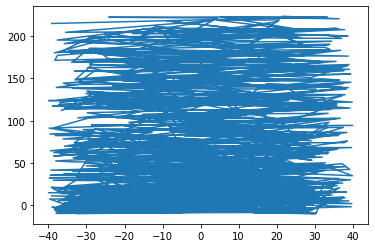

In [14]:
plt.plot(df["x-inv"], df["force"])
plt.show()

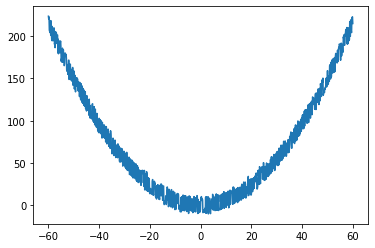

In [15]:
plt.plot(df["y-inv"], df["force"])
plt.show()

As we can observe, the plot of y-inv vs force comes out to be a simple polynomial graph. We thus conclude that the output dependes on degree>1 of the input

plotting y-inv^2 against force

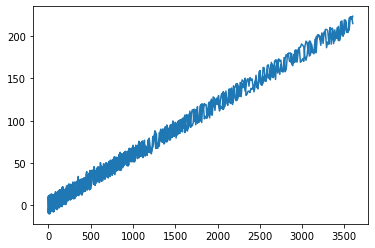

In [16]:
plt.plot(df["y-inv"]**2, df["force"])
plt.show()

### Code below runs for degrees less than 20 and find which degree gives the least error

In [17]:
min = 1000
mini = 0
Y_sample = df[["force"]]

for i in range(1,20):
    X_sample = df[["x-inv", "y-inv"]]
    polyDegree = i
    X_sample = X_sample/X_sample.abs().max()
    poly = PolynomialFeatures(polyDegree)
    X_sample = poly.fit_transform(X_sample)
    X_sample_train, X_sample_test, Y_train, Y_test = train_test_split(X_sample,Y_sample, test_size=0.2, random_state=5)

    lr = LinearRegression()
    lr.fit(X_sample_train,Y_train)

    Y_model = lr.predict(X_sample_test)
    mse = mean_squared_error(Y_model, Y_test)
    if(i==17):
        print(i , mean_squared_error(Y_model, Y_test))
    if(mse<min):
        min = mse
        mini = i

mini, min

17 17.314443443078414


(16, 16.867950697421033)

## Since the previous code returns 16 as the degree with least MSE, we train our data with degree 16

In [18]:
poly = PolynomialFeatures(17)
X = poly.fit_transform(X)
lr.fit(X, Y)

LinearRegression()

## Predicting for the testing data

In [19]:
df_test = pd.read_csv("./testing_data.csv")
X = df_test[["x-inv", "y-inv"]]
X = X/X.abs().max()

X_test = poly.fit_transform(X)
y_test = lr.predict(X_test)

# Submission

In [20]:
y_test = pd.DataFrame(y_test, columns=["force"])
y_test['ID'] = df_test[["ID"]]
y_test = y_test[["ID", "force"]]
y_test.to_csv("sub1.csv", index=False)